In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
from sklearn.model_selection import train_test_split

In [25]:
X_blobs, y_blobs = make_blobs(n_samples=1000, centers=4, cluster_std=.7, random_state=0)


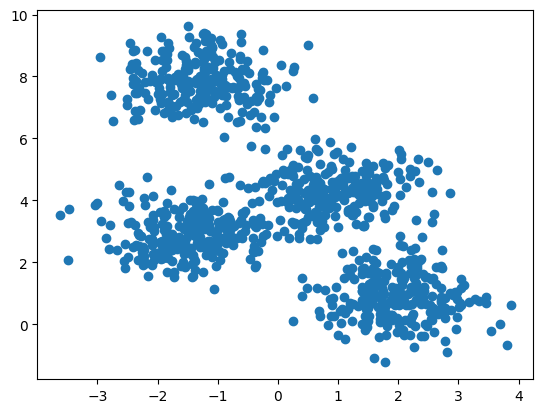

In [26]:
plt.scatter(X_blobs[:, 0], X_blobs[:, 1])
plt.show()

In [27]:
def kmeans(X_blobs, n_clusters, random_seed):
    np.random.default_rng(random_seed)
    idx = np.random.choice(np.arange(X_blobs.shape[0]), n_clusters, replace=False )
    centers = X_blobs[idx]

    while True:
        labels = pairwise_distances_argmin(X_blobs, centers)
        new_centers = np.zeros((n_clusters, X_blobs.shape[1]))
        for i in range(n_clusters):
            cluster_mean = np.zeros(X_blobs.shape[1])
            cluster_size = 0
            for j in range(X_blobs.shape[0]):
                if labels[j] == i:
                    cluster_mean += X_blobs[j]
                    cluster_size += 1
            cluster_mean /= cluster_size
            new_centers[i] = cluster_mean

        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels

In [28]:
centers, labels  = kmeans(X_blobs, 4, 1)

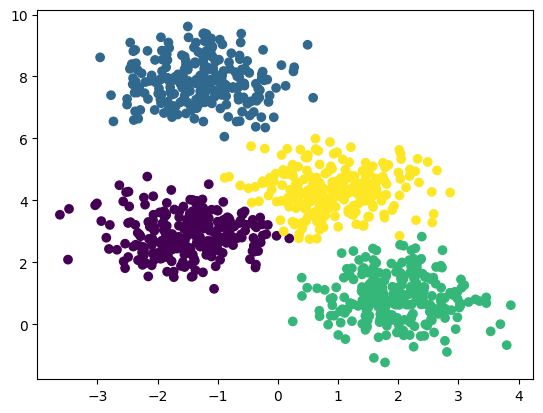

In [29]:
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels, cmap="viridis")
plt.show()

In [30]:
def kmeans_plusplus(X_blobs, n_clusters, random_seed):
    np.random.default_rng(random_seed)
    centers = np.zeros((n_clusters, X_blobs.shape[1]))
    center_index = np.random.choice(np.arange(X_blobs.shape[0]), 1)
    centers[0] = X_blobs[center_index]
    center_indices = [center_index]

    for i in range(1, n_clusters):
        probs = np.zeros(X_blobs.shape[0])
        for j in range(X_blobs.shape[0]):
            dist = np.linalg.norm(X_blobs[j] - centers[:1])**2
            probs[i] = np.min(dist)
        
        probs /= np.sum(probs)
        center_index = np.random.choice(np.arange(X_blobs.shape[0]), 1, p=probs)
        centers[i] = X_blobs[center_index]
        center_indices.append(center_index)
        
    while True:
        labels = pairwise_distances_argmin(X_blobs, centers)
        new_centers = np.zeros((n_clusters, X_blobs.shape[1]))
        for i in range(n_clusters):
            cluster_mean = np.zeros(X_blobs.shape[1])
            cluster_size = 0
            for j in range(X_blobs.shape[0]):
                if labels[j] == i:
                    cluster_mean += X_blobs[j]
                    cluster_size += 1
            cluster_mean /= cluster_size
            new_centers[i] = cluster_mean

        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels


In [31]:
centers_, labels_ = kmeans_plusplus(X_blobs, 4, 1)

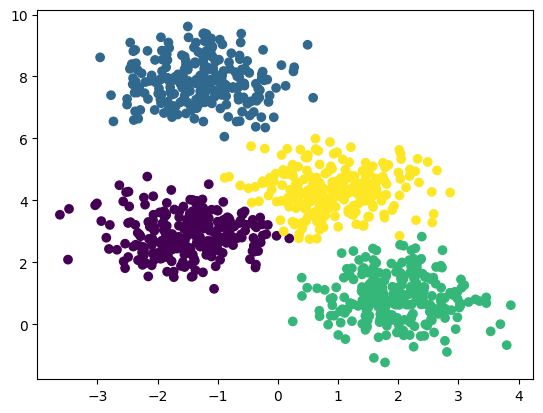

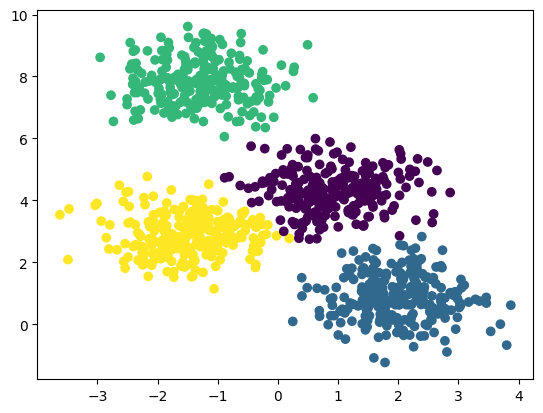

In [32]:
plt.scatter(X_blobs[:,0], X_blobs[:,1], c=labels, cmap='viridis')
plt.show()
plt.scatter(X_blobs[:,0], X_blobs[:,1], c=labels_, cmap='viridis')
plt.show()

In [33]:
# using kmeans directly from sklearn

from sklearn.cluster import KMeans

In [34]:
new_labels = KMeans(4, random_state=0).fit_predict(X_blobs)

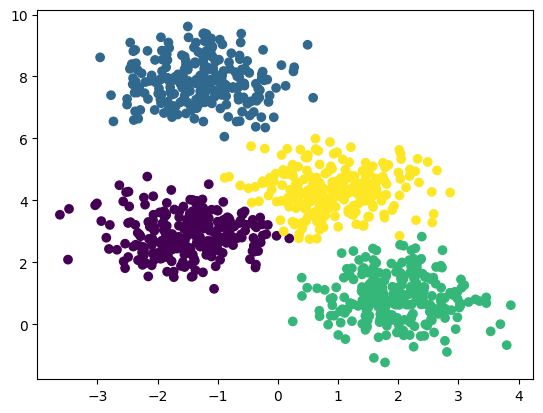

In [35]:
plt.scatter(X_blobs[:,0], X_blobs[:, 1], c=new_labels, cmap="viridis")

In [36]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=0.05, random_state=0)


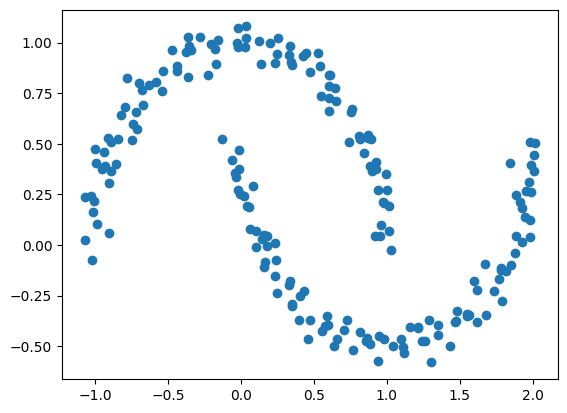

In [37]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

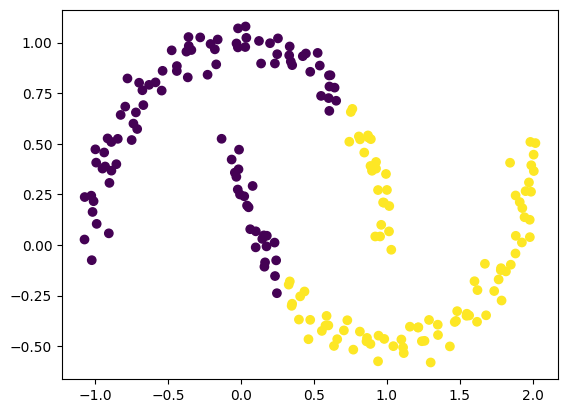

In [38]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis")
plt.show()

In [39]:
from sklearn.cluster import SpectralClustering
labels = SpectralClustering(n_clusters=2, assign_labels="kmeans", affinity="nearest_neighbors").fit_predict(X)

c:\Users\appenteng.adjepong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


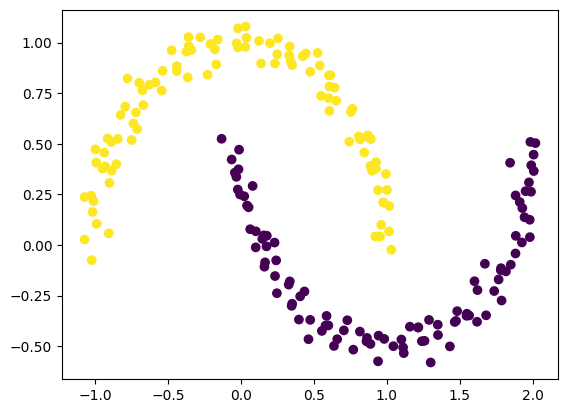

In [40]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis")
plt.show()

In [45]:
sum_squared_error = []
k_range = range(1, 10)
for k in k_range:
    model = KMeans(n_clusters=k, random_state=0).fit(X_blobs)
    sum_squared_error.append(model.inertia_)
sum_squared_error
    

[9586.172149200618,
 3976.9007357002,
 1878.0055514766962,
 917.1371511943935,
 835.1322242494373,
 748.0558262451833,
 667.2673903941944,
 599.0362787385324,
 543.4008487936931]

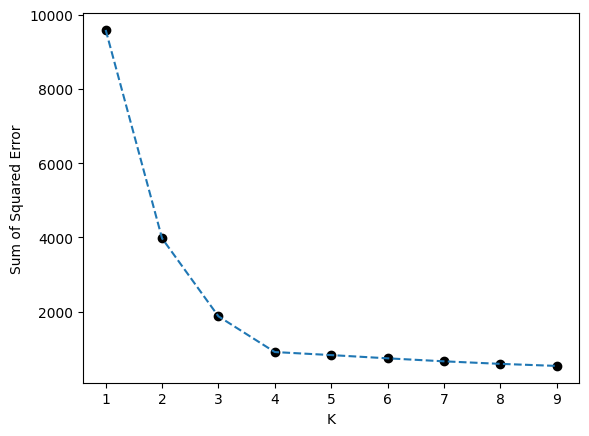

In [46]:
plt.plot(k_range, sum_squared_error, "--")
plt.scatter(k_range, sum_squared_error, marker="o", color="k")
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.show()